## Naive Bayes Algorithm
Naive Bayes is a probabilistic machine learning algorithm that can be used in a wide variety of classification tasks. 

<br>
The name naive is used because it assumes the features that go into the model are independent of each other. That is changing the value of one feature, does not directly influence or change the value of any of the other features used in the algorithm.
![alt text](assets/naive.png)
![alt text](assets/naive_data.png)
<ul>
<li> Step 1: Compute the ‘Prior’ probabilities for each of the class of fruits ex P(Y=Banana) = 500 / 1000 = 0.50
<li>  Step 2: Compute the probability of evidence that goes in the denominatorex P(x1=Long) = 500 / 1000 = 0.50
<li> Step 3: Compute the probability of likelihood of evidences that goes in the numerator ex P(x1=Long | Y=Banana) = 400 / 500 = 0.80
</ul>

Set password to jupyter using terminal
<br>
jupyter notebook password

In [33]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [34]:
df = pd.read_csv("spam.csv",encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [35]:
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [36]:
df.shape

(5572, 2)

<AxesSubplot:ylabel='v1'>

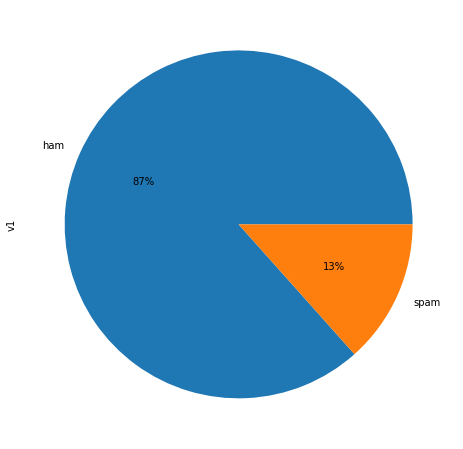

In [37]:
plt.figure(figsize=(8,8))
df["v1"].value_counts().plot(kind='pie', autopct='%1.00f%%')

In [38]:
df['v2'] = df['v2'].str.lower()
df.head()

,v1,v2
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


In [39]:
import string
txt = "Hallo Sam!"

mytable = txt.maketrans("a", "e")
print(mytable)
print(txt.translate(mytable))

{97: 101}
Hello Sem!


In [40]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [41]:
import string
df['v2'] = df['v2'].str.translate(str.maketrans('','',string.punctuation))
df.head()

,v1,v2
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...


In [42]:
#messages remove stopwords
def remove_stop_words(messages):
    no_stop = []
    for message in messages:
        if message not in stopwords.words('english'):
            no_stop.append(message)
    return no_stop
messages=messages.apply(remove_stop_words)

NameError: name 'messages' is not defined

The sample() function is used to get a random sample of items from an axis of object.
<br>
Fraction of axis items to return
<br>
split data to x and y

In [43]:
df_random = df.sample(frac=1, random_state=42)
X = df_random["v2"]  
y = df_random["v1"]
#print(X)
#print(y)

In [44]:
!pip install --user -U nltk

In [45]:
import nltk  
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


KeyboardInterrupt: 

In [46]:
from nltk.corpus import stopwords 
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [47]:
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import TfidfVectorizer 
# max_df is used for removing terms that appear too frequently -> ignore terms that appear in more than 50% of the documents
# min_df is used for removing terms that appear too infrequently -> ignore terms that appear in less than 5 documents
#tf(t) = (No. of times term ‘t’ occurs in a document) / (No. Of terms in a document)
#if the word repeated to much that is mean it's less important

tfidf_vec = TfidfVectorizer (max_features=2500, min_df=5, max_df=0.8, stop_words=stopwords.words('english')) 
X= tfidf_vec.fit_transform(X)

In [48]:
training_index = round(len(df_random) * 0.8)

In [49]:
x_train = X[:training_index]
y_train = y[:training_index]

In [50]:
x_test = X[training_index:]
y_test = y[training_index:]

In [51]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

In [52]:
clf.fit(x_train.toarray() , y_train)

GaussianNB()

In [58]:
x_train.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [53]:
clf.score(x_test.toarray(), y_test)

0.8456014362657092

In [59]:
sample_email = "Hello mohamed i am your friend ali "

In [60]:
vec =tfidf_vec.transform([sample_email]).toarray()

In [61]:
clf.predict(vec)

array(['spam'], dtype='<U4')